Vamos a ver unos histogramas y boxplots de las variables numéricas, para ver cómo se distribuyen y si tienen muchos valores atípicos.

<Figure size 1080x720 with 0 Axes>

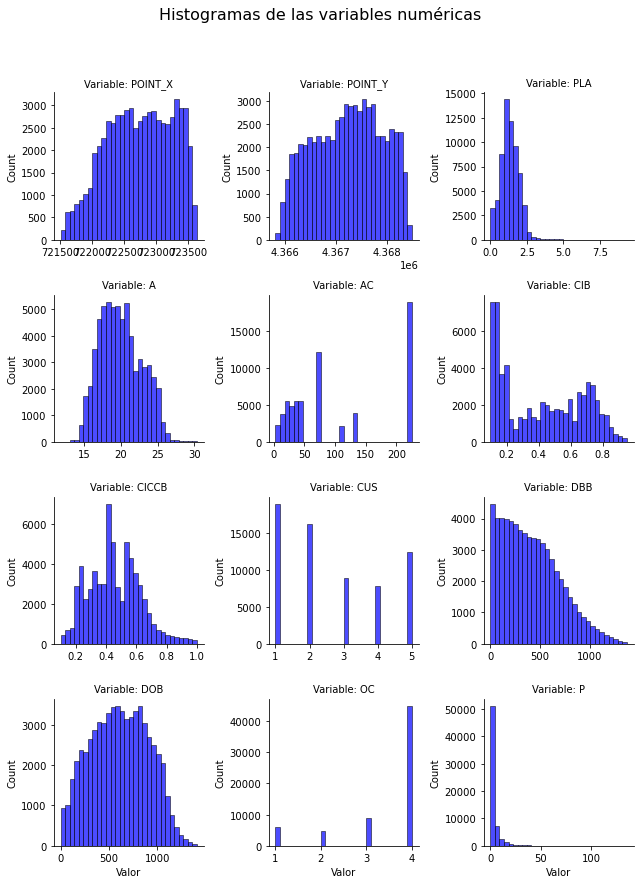

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("data_stored.csv")


# Para histogramas y boxplots facetados, necesitamos "aplanar" el DataFrame
data_long = data.melt(var_name="Variable", value_name="Valor")

#### HISTOGRAMA

plt.figure(figsize=(15, 10))
g = sns.FacetGrid(data_long, col="Variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "Valor", bins=30, color="blue", edgecolor="black", alpha=0.7)
g.set_titles("Variable: {col_name}")
g.fig.suptitle("Histogramas de las variables numéricas", y=1.02, fontsize=16) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el layout para el título superior
plt.show()


Como se puede ver en los histogramas, las variables no muestran una distribución normal, por lo tanto deberían ser normalizadas.

Ahora veremos los boxplots

C:\Users\cuent\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x720 with 0 Axes>

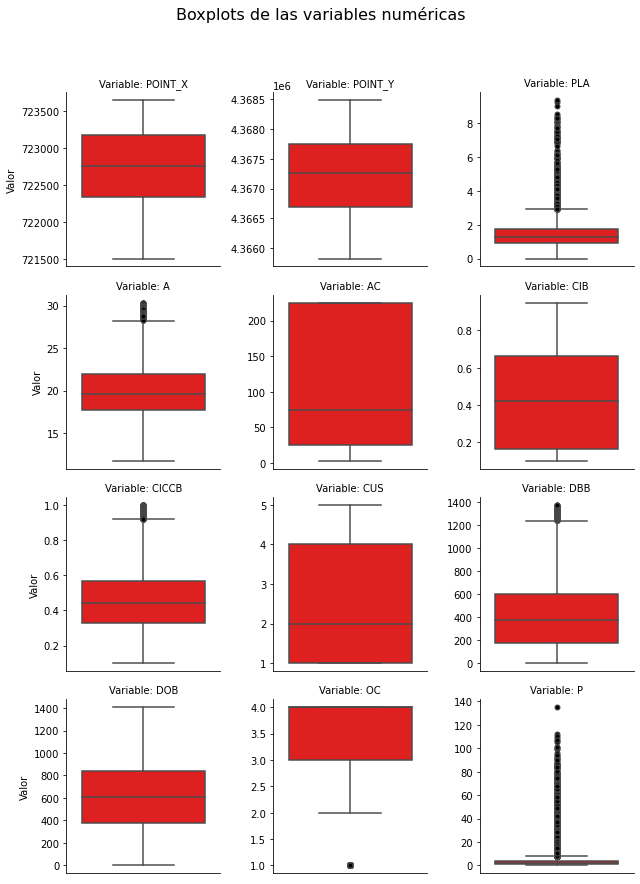

In [10]:
#### BOXPLOT

plt.figure(figsize=(15, 10)) # Ajusta el tamaño

data_long["_dummy_x_boxplot"] = ""

g_box = sns.FacetGrid(data_long, col="Variable", col_wrap=3, sharey=False) # 'sharey=False' para ejes Y libres

# Map sns.boxplot:
# '_dummy_x_boxplot' va al eje X.
# 'Valor' va al eje Y.
g_box.map(sns.boxplot, "_dummy_x_boxplot", "Valor", color="red", flierprops=dict(marker='o', markerfacecolor='black', markersize=5))

# Limpiar las etiquetas y ticks del eje X dummy para que no se vean
g_box.set_axis_labels("", "Valor") # Pone etiqueta del eje X vacía, Y como "Valor"
# Iterar sobre cada subplot para quitar los ticks del eje X
for ax in g_box.axes.flat:
    ax.set_xticks([]) # Elimina los ticks del eje X
    ax.set_xticklabels([]) # Elimina las etiquetas de los ticks del eje X

g_box.set_titles("Variable: {col_name}")
g_box.fig.suptitle("Boxplots de las variables numéricas", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

En los boxplots se puede ver que PLA y P muestran una gran cantidad de valores atípicos. También los muestran en menor medida A, CICCB y DBB.